In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy, binary_crossentropy
from tensorflow.keras.utils import plot_model, to_categorical

c:\Users\PC\Desktop\PRUEBA\myenv\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\PC\Desktop\PRUEBA\myenv\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
c:\Users\PC\Desktop\PRUEBA\myenv\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/resource_handle.proto. Please update the gencode to avoid compa

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0

Ahora debemos corroborar las formas de los datos de entrada

In [4]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [5]:
#Al no tener la forma de los datos (batch, x_size, y_size, channels), no puede ser visualizado por una CNN básica

x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

In [6]:
x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

Listo, ahora que tenemos las formas correctas para una CNN, ocupamos hacer one-hot los labels

In [7]:
print(f"Antes de one-hot: \n {y_train} \n {y_test}")

Antes de one-hot: 
 [5 0 4 ... 5 6 8] 
 [7 2 1 ... 4 5 6]


In [8]:
y_train_m1 = to_categorical(y_train)
y_test_m1 = to_categorical(y_test)

In [9]:
print(f"Después de one-hot: \n {y_train_m1} \n {y_test_m1}")

Después de one-hot: 
 [[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]] 
 [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [10]:
#Ahora si podemos hacer el modelo con Functional API (es mi primera vez intentandolo xd)

inputs = Input(shape = (28, 28, 1))
x = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform')(inputs) #28 - 3 + 1 = 26
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x) #13, 13

x = Conv2D(64, (3, 3), activation='relu', kernel_initializer = 'he_uniform')(x) #11, 11
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x) #5, 5

x = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform')(x) #3, 3
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x) #1, 1

x = Flatten()(x)
x = Dense(64, activation='relu', kernel_initializer='he_uniform')(x)
outputs = Dense(10, activation='softmax', kernel_initializer='he_uniform')(x)

modelo = Model(inputs = inputs, outputs = outputs, name = 'My_first_functional_API_model_in_Keras')

In [11]:
modelo.summary()

Model: "My_first_functional_API_model_in_Keras"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 11, 11, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 3, 3, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,194 (239.04 KB)

 Trainable params: 60,874 (237.79 KB)

 Non-trainable params: 320 (1.25 KB)

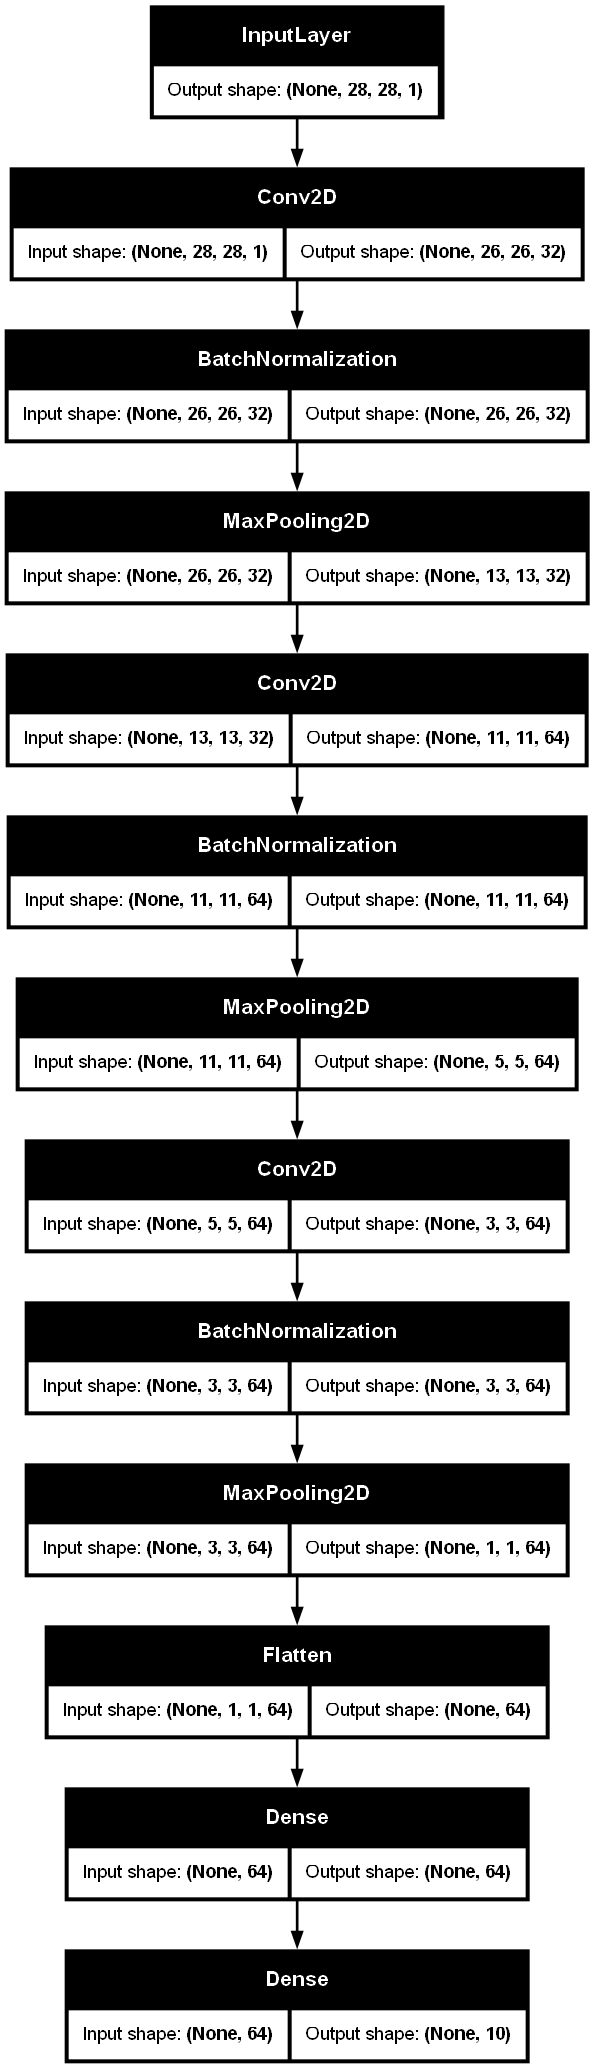

In [12]:

keras.utils.plot_model(model=modelo, show_shapes = True, dpi = 96)

In [13]:
modelo.compile(
    loss = CategoricalCrossentropy(from_logits=True),
    optimizer = Adam(learning_rate = 1e-4),
    metrics = ['accuracy']  
)

In [14]:
historial = modelo.fit(x_train, y_train_m1, epochs=5, validation_split = 0.2)

Epoch 1/5


c:\Users\PC\Desktop\PRUEBA\myenv\Lib\site-packages\keras\src\backend\tensorflow\nn.py:675: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8311 - loss: 0.5736 - val_accuracy: 0.9484 - val_loss: 0.1813
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9554 - loss: 0.1531 - val_accuracy: 0.9640 - val_loss: 0.1193
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9695 - loss: 0.1008 - val_accuracy: 0.9713 - val_loss: 0.0923
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9780 - loss: 0.0738 - val_accuracy: 0.9748 - val_loss: 0.0823
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9836 - loss: 0.0568 - val_accuracy: 0.9753 - val_loss: 0.0783


In [15]:
test_scores = modelo.evaluate(x_test, y_test_m1, verbose = 2)

313/313 - 1s - 2ms/step - accuracy: 0.9774 - loss: 0.0790


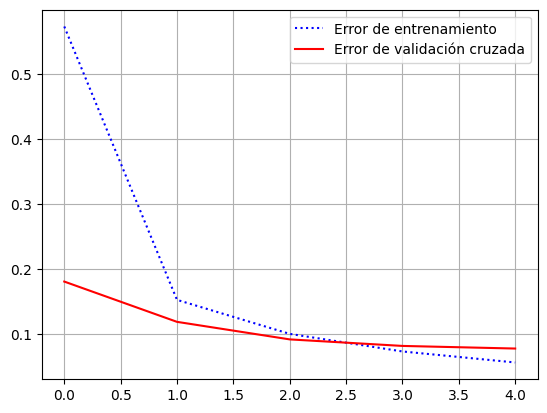

In [16]:
import matplotlib.pyplot as plt

plt.plot(historial.history['loss'], ':b', label = "Error de entrenamiento")
plt.plot(historial.history['val_loss'], "-r", label = "Error de validación cruzada")
plt.grid()
plt.legend()
plt.show()

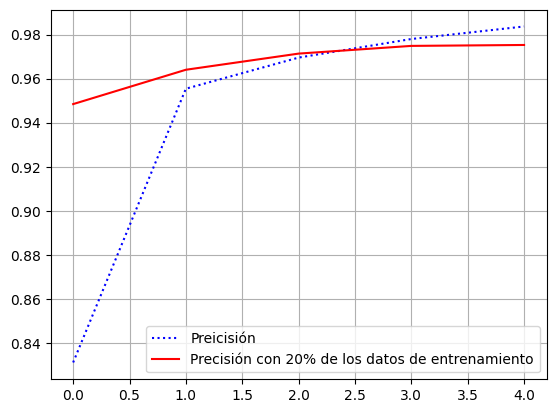

In [17]:
plt.plot(historial.history['accuracy'], ":b", label = "Preicisión")
plt.plot(historial.history['val_accuracy'], "-r", label = "Precisión con 20% de los datos de entrenamiento")
plt.grid()
plt.legend()
plt.show()

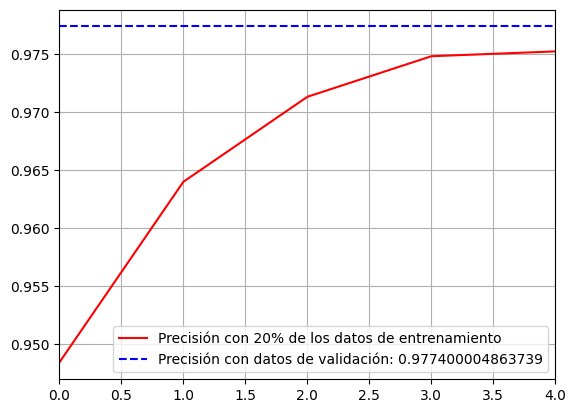

In [18]:
#Ahora comparemos la validación del 20% de datos y del modelo.evalute
plt.plot(historial.history['val_accuracy'], "-r", label = "Precisión con 20% de los datos de entrenamiento")
plt.axhline(y = test_scores[1], color = "b", linestyle = "--", label = f"Precisión con datos de validación: {test_scores[1]}")
plt.xlim(0, 4)
plt.grid()
plt.legend()
plt.show()


Bueno ahora intentaré un modelo donde sea multisalida **USARÉ LOS MISMOS DATOS, PERO DIFERENTE MODELO (es el mismo, solo que con multisalida)**

In [19]:
inputs = Input(shape = (28, 28, 1))

x = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform')(inputs) #28 - 3 + 1 = 26
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x) #13, 13

x = Conv2D(64, (3, 3), activation='relu', kernel_initializer = 'he_uniform')(x) #11, 11
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x) #5, 5

x = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform')(x) #3, 3
x = BatchNormalization()(x)
x = MaxPooling2D((2, 2))(x) #1, 1

x = Flatten()(x)
x = Dense(64, activation='relu', kernel_initializer='he_uniform')(x)
output1 = Dense(1, activation = 'sigmoid', kernel_initializer='glorot_uniform', name = 'par')(x)
output2 = Dense(10, activation='softmax', kernel_initializer='he_uniform', name = 'digito')(x)

modelo_2 = Model(inputs = [inputs], outputs = [output1, output2])

In [20]:
modelo_2.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 28, 28, 1) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 26, 26,    │        320 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 26, 26,    │        128 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 13, 13,    │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 11, 11,    │     18,496 │ max_pooling2d_3[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 11, 11,    │        256 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_4     │ (None, 5, 5, 64)  │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 3, 3, 64)  │     36,928 │ max_pooling2d_4[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 3, 3, 64)  │        256 │ conv2d_5[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_5     │ (None, 1, 1, 64)  │          0 │ batch_normalizat… │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 64)        │          0 │ max_pooling2d_5[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 64)        │      4,160 │ flatten_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ par (Dense)         │ (None, 1)         │         65 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ digito (Dense)      │ (None, 10)        │        650 │ dense_2[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 61,259 (239.29 KB)

 Trainable params: 60,939 (238.04 KB)

 Non-trainable params: 320 (1.25 KB)

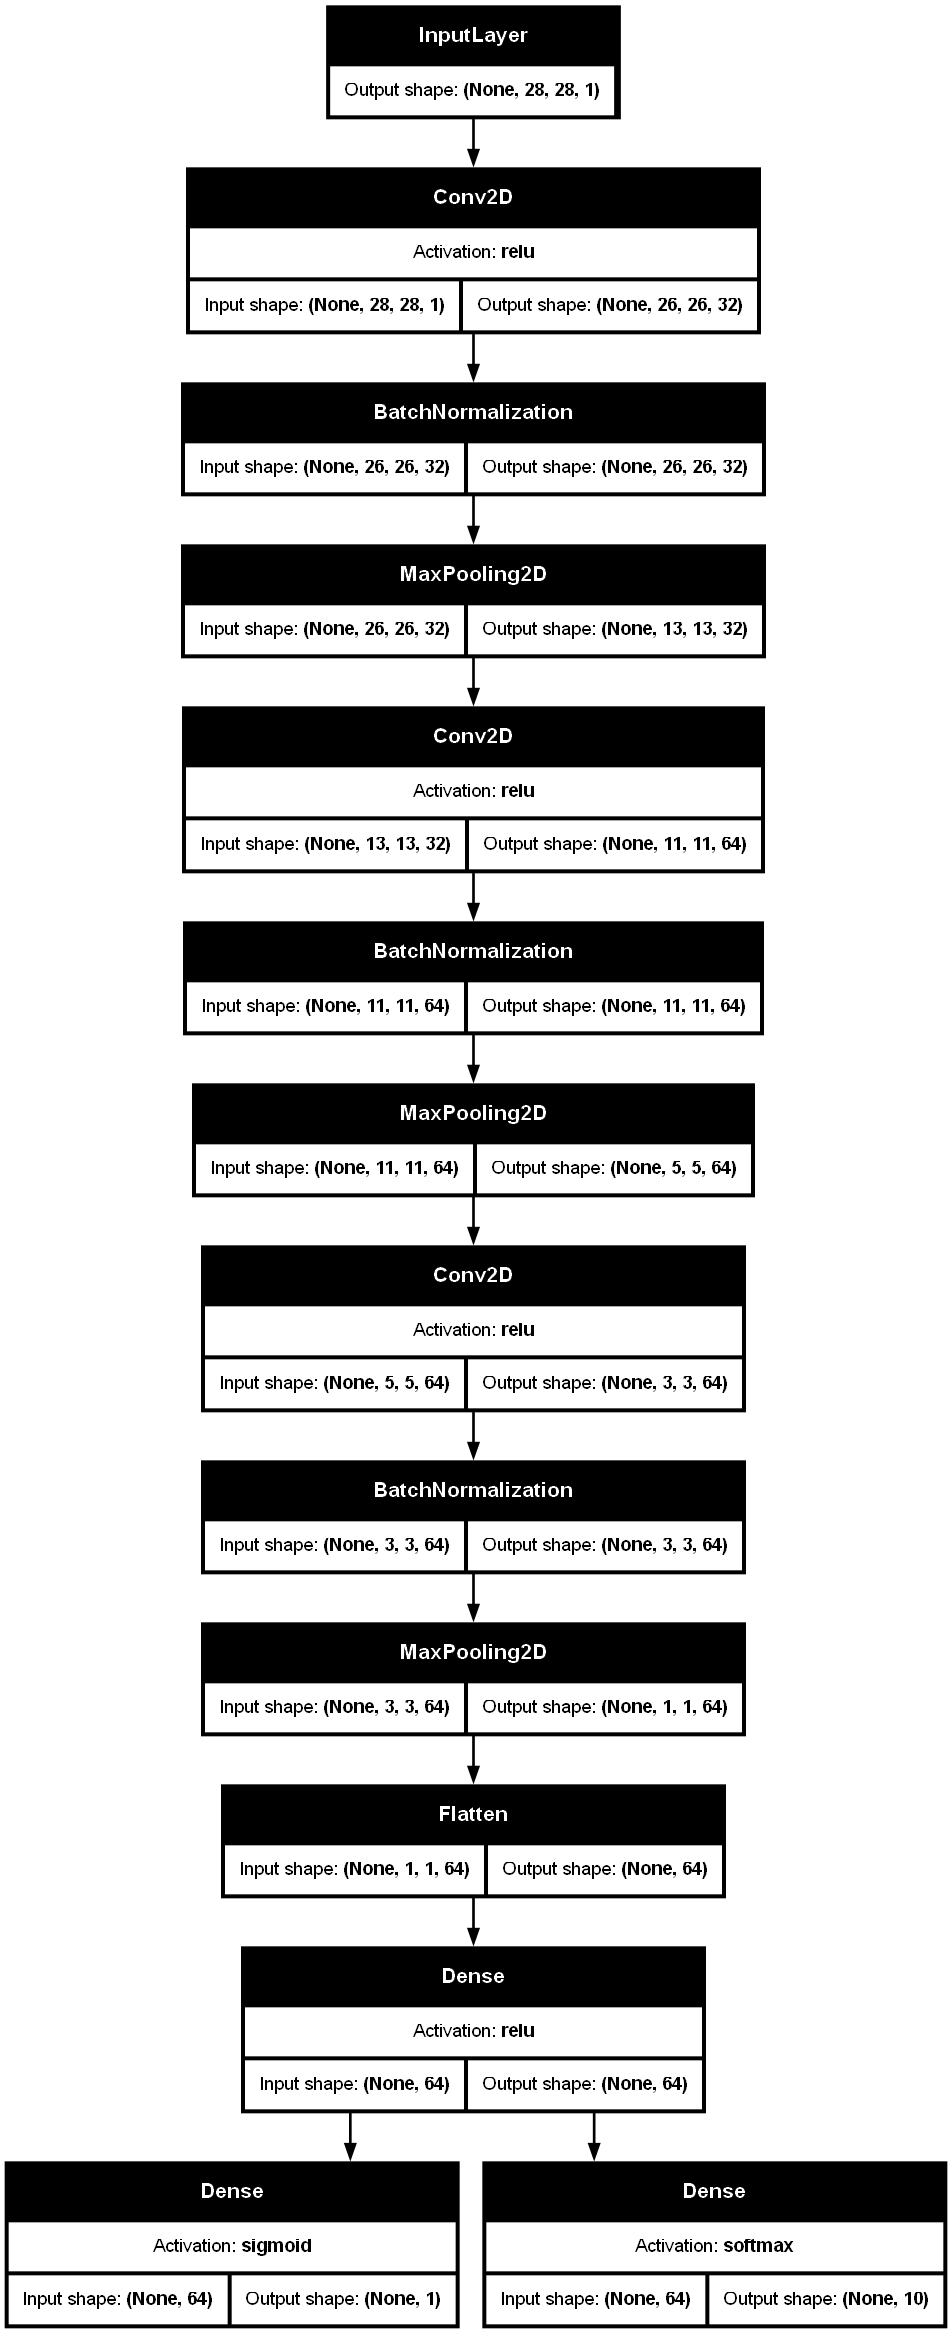

In [21]:
import pydot
import graphviz

plot_model(modelo_2, show_shapes=True, show_layer_activations=True, dpi=96)

In [22]:
modelo_2.compile(
    loss = { 'par': 'binary_crossentropy', 'digito': 'categorical_crossentropy'},
    optimizer = Adam(1e-4),
    metrics = {'par': 'accuracy', 'digito': 'accuracy'}
)

In [23]:
y_train_par = (y_train % 2 == 0).astype(int)
y_test_par = (y_test % 2 == 0).astype(int)

In [24]:
print(f"y_train = {y_train_par} \n y_test = {y_test}")

y_train = [0 1 1 ... 0 1 1] 
 y_test = [7 2 1 ... 4 5 6]


In [ ]:
#Hacemos solo one-hot el y_train de los dígitos
y_train_m2 = to_categorical(y_train)

In [26]:
validation_batch = int(0.2 * len(x_train))

x_train_split = x_train[validation_batch:]
y_train_par_split = y_train_par[validation_batch:]
y_train_split = y_train_m2[validation_batch:]

x_val = x_train[:validation_batch]
y_val_par = y_train_par[:validation_batch]
y_val = y_train_m2[:validation_batch]

In [27]:
print("x_train_split:", x_train_split.shape)
print("y_train_par_split:", y_train_par_split.shape)
print("y_train_split:", y_train_split.shape)

print("x_val:", x_val.shape)
print("y_val_par:", y_val_par.shape)
print("y_val:", y_val.shape)


x_train_split: (48000, 28, 28, 1)
y_train_par_split: (48000,)
y_train_split: (48000, 10)
x_val: (12000, 28, 28, 1)
y_val_par: (12000,)
y_val: (12000, 10)


In [28]:
y_train_par_split.reshape(48000, 1)
y_val_par.reshape(12000, 1)

array([[0],
       [1],
       [1],
       ...,
       [1],
       [1],
       [0]], shape=(12000, 1))

In [29]:
historial = modelo_2.fit(x_train_split, {"par" : y_train_par_split, "digito" : y_train_split}, epochs = 5, batch_size=64)

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - digito_accuracy: 0.7946 - digito_loss: 0.6727 - loss: 0.9165 - par_accuracy: 0.8996 - par_loss: 0.2438
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - digito_accuracy: 0.9429 - digito_loss: 0.1961 - loss: 0.2869 - par_accuracy: 0.9681 - par_loss: 0.0908
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - digito_accuracy: 0.9614 - digito_loss: 0.1311 - loss: 0.1958 - par_accuracy: 0.9776 - par_loss: 0.0647
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - digito_accuracy: 0.9699 - digito_loss: 0.0994 - loss: 0.1503 - par_accuracy: 0.9821 - par_loss: 0.0509
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - digito_accuracy: 0.9767 - digito_loss: 0.0792 - loss: 0.1209 - par_accuracy: 0.9861 - par_loss: 0.0417


In [31]:
y_test_m2 = to_categorical(y_test)
y_test_par = (y_test % 2 == 0).astype(int)

modelo_2.evaluate(x_test, [y_test_par, y_test_m2])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - digito_accuracy: 0.9757 - digito_loss: 0.0862 - loss: 0.1301 - par_accuracy: 0.9853 - par_loss: 0.0437


[0.1300702691078186,
 0.043736472725868225,
 0.0861981213092804,
 0.9757000207901001,
 0.9853000044822693]

Errores enfrentados:

- ValueError: Attr `Toutput_types` of `OptionalFromValue` Op passed list of length 0 less than minimum 1. **Causa: La definición del error de dígito estaba en CategoricalCrossentropy, en lugar de "categorical_crossentropy".**
- ValueError: Arguments `target` and `output` must have the same shape. Received: target.shape=(64, 10), output.shape=(64, 1). **Causa: Pasaba mal los datos al método fit**